![Py4Eng](img/logo.png)

# Plotting with Python: Matplotlib
## Yoav Ram

<a href="http://matplotlib.org" target="_blank"><img src="http://matplotlib.org/_static/logo2.svg" alt="Matplotlib logo" width="500px"/></a>

The mathematician Richard Hamming once said, **"The purpose of computing is insight, not numbers"**, and the best way to develop insight is often to visualize data. While there is no "official" plotting library, *matplotlib* is the _de facto_ standard. 

From Wikipedia:
> matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits... There is also a procedural "pylab" interface... designed to closely resemble that of **MATLAB**.

> The pylab interface makes matplotlib easy to learn for experienced MATLAB users, making it a viable alternative to MATLAB as a teaching tool for numerical mathematics and signal processing.
> Some of the advantages of the combination of Python, NumPy, and matplotlib over MATLAB include:
> -  Based on Python, a full-featured modern object-oriented programming language suitable for large-scale software development
> - Free, open source, no license servers
> - Native SVG support

First, let's tell the notebook that we want our plots displayed inline, rather than in a separate viewing window. This command will also import many other useful scientific python functions and modules, including NumPy:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
print("Matplotlib version:", mpl.__version__)

Matplotlib version: 3.1.1


The `inline` part was to tell the notebook to use Matplotlib's `nbagg` backend, which work good with the notebook (hence the `nb` in `nbagg`). There are other backends, such as those used for web and for GUI. You can also set it to `notebook` instead of `inline` if you want the figure toolbar, similar to MATLAB.

For this tutorial we didn't need to import `matplotlib`, we just imported it to get the version.

# Plotting patient data

We are back to our patient infection data from the NumPy session.

In [2]:
fname = "../data/inflammation-01.csv"
data = np.loadtxt(fname, delimiter=',')
print(data)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]


We use matplotlib display a the data with `imshow`, which plots a matrix as if it was an image (hence `im`) using a color map that maps each number to a color.
The default colormap is `viridis` but can be changed using the argument `cmap`.

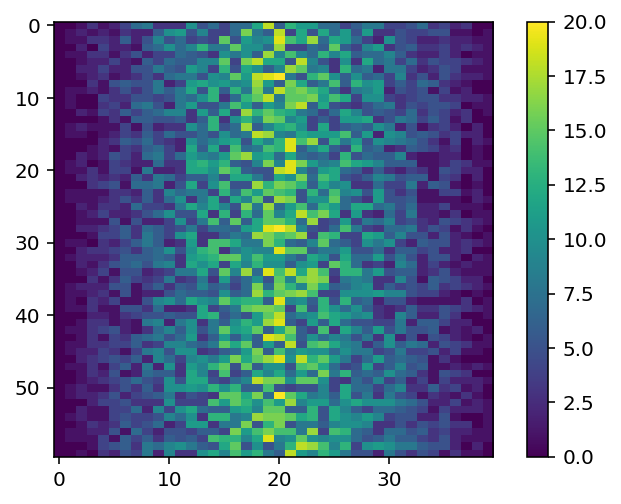

In [3]:
plt.imshow(data, aspect=0.66) 
cb = plt.colorbar(fraction=0.045)

`aspect` controls the width of one x unit vs. one y unit.
`fraction` controls the size of the colorbar compared to the plot.

Blue regions in this heatmap are low values, while yellow shows high values. As we can see, inflammation rises and falls over a 40-day period.

Let's take a look at the average inflammation over time: we now plot a line plot using the function `plot`. It can be given x and y data, but if given only one series it will use it as y and infer x to be consecutive number from 0 to length of y.

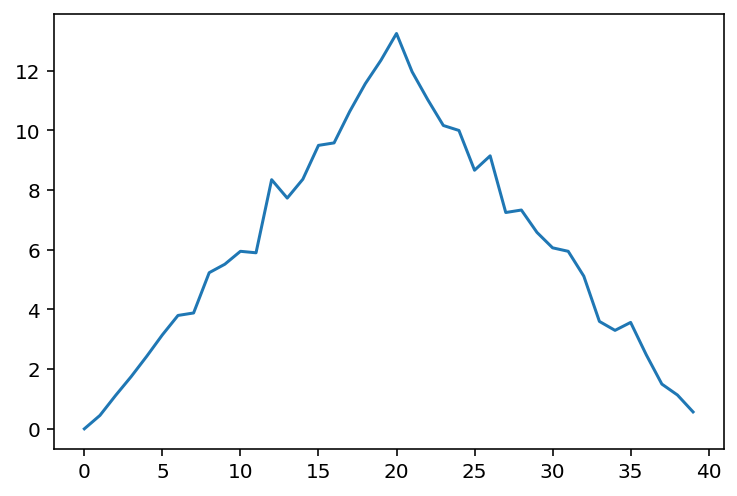

In [4]:
avg_inflammation = data.mean(axis=0)
plt.plot(avg_inflammation);

Here, we have put the average per day across all patients in the variable `avg_inflammation`, then used `plot` to create and display a line graph of those values. The result is roughly a linear rise and fall, which is suspicious: based on other studies, we expect a sharper rise and slower fall.

## Exercise 1

Let's have a look at two other statistics - plot the average, minimum, and maximum inflammation, all on the same plot.
Also create a legend (`plt.legend`) with appropriate labels for each line.
Labels can be specified by adding `label=....` to `plot`.
Don't forget to add axes labels using `plt.xlabel` and `plt.ylabel`.

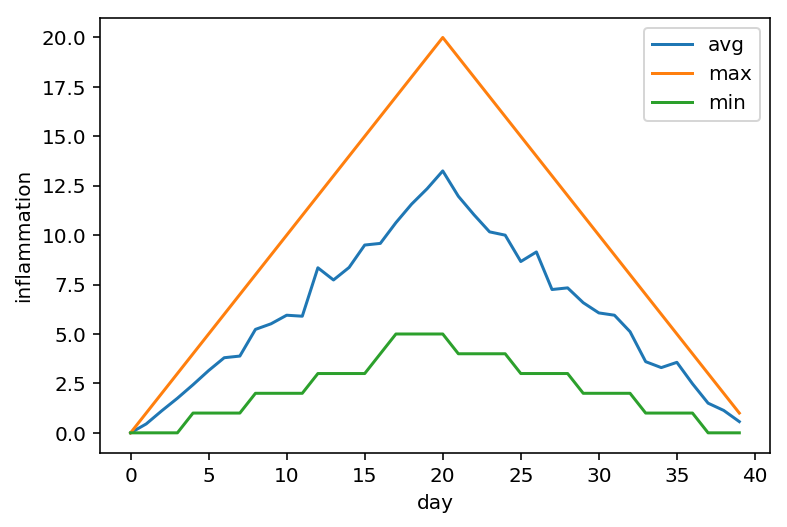

Matplotlib has many more plotting commands.
For example, we can calculate the _standard deviation of the mean_ (`sem`) which is defined as the standard deviation of the sample divided by the square root of the number of the samples:
$$
\sqrt{\frac{\sum_i{(x_{i=1}^{n} - \mu)^2}}{N}}
$$
This can be calculated using the method `std` and the function `sqrt`. 

Note that when calculating the standard deviation of a sample, the degrees of freedom is $n-1$ - this is represented by the `ddof=1` argument to `std`.

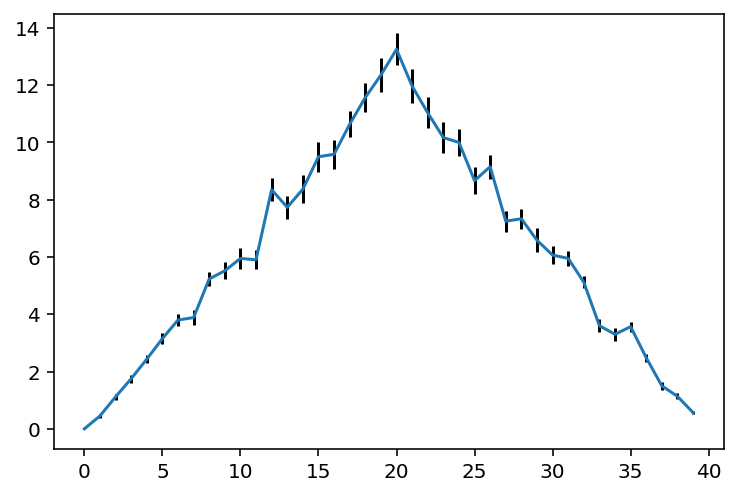

In [5]:
n_patients, n_days = data.shape
sem_inflammation = data.std(axis=0, ddof=1) / np.sqrt(n_patients)
plt.errorbar(
    x=range(n_days), 
    y=avg_inflammation, 
    yerr=sem_inflammation, 
    ecolor='k' # black bars
);

## Exercise 2

In a previous exercise we calculated the day in which each patient had the most inflammation.

Let's plot it now - make a scatter plot using the `scatter` command, with patient number on x-axis and day of max inflammation on y-axis.
Don't forget to add axis labels with `xlabel` and `ylabel`!

Note that `scatter` requires two data series for both x and y.

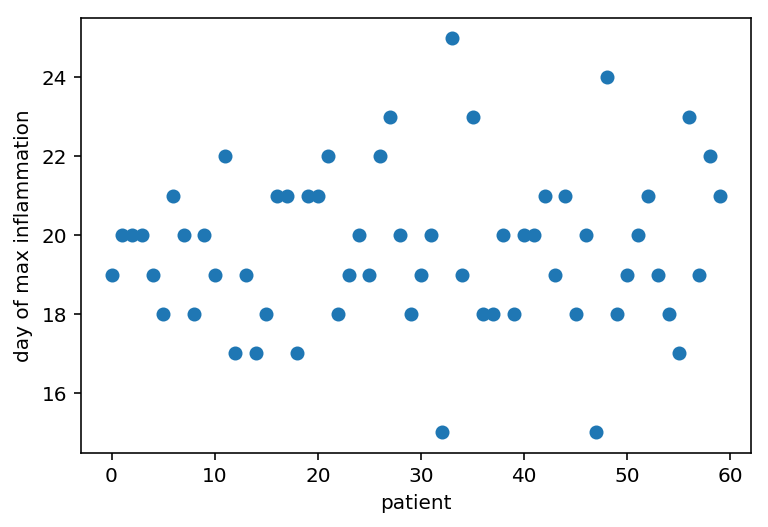

# Anatomy of Matplotlib

[Matplotlib has three layers](https://waterprogramming.wordpress.com/2016/04/29/interactive-plotting-basics-in-matplotlib/):

- Script layer: The data is either created or loaded in the scripting layer, this layer basically supports the programmatic interaction and provides users with the ability to manipulate figures with a syntax that is somewhat intuitive.
- Artist layer - The data is transformed into various objects in the artist layer; it is adjusted as scripted.  This layer is responsible for the abstraction of each visual component that you see in a figure.
 - Backend layer: These objects are then rendered by the backend. This last layer enables the users to create, render, and update the figure objects. Figures can be displayed and interacted with via common user interface events such as the keyboard and mouse inputs.

People use "plot" to mean many different things. Here, we'll be using a consistent terminology (mirrored by the names of the underlying classes, etc):

![Plot anatomy](https://raw.githubusercontent.com/yoavram/AnatomyOfMatplotlib/master/images/figure_axes_axis_labeled.png)

The Figure is the top-level container in this hierarchy. It is the overall window/page that everything is drawn on. You can have multiple independent figures and Figures can contain multiple Axes.

Most plotting ocurs on an Axes. The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it. Usually we'll set up an Axes with a call to subplot (which places Axes on a regular grid), so in most cases, Axes and Subplot are synonymous.

Each Axes has an XAxis and a YAxis. These contain the ticks, tick locations, labels, etc. In this tutorial, we'll mostly control ticks, tick labels, and data limits through other mechanisms, so we won't touch the individual Axis part of things all that much. However, it's worth mentioning here to explain where the term Axes comes from.

### Figures

Now let's create a figure...

In [6]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

Awww, nothing happened! This is because we didn't plot anything or created any axes.

### Axes

All plotting is done with respect to an `Axes`. An `Axes` is made up of Axis objects and many other things. An `Axes` object must belong to a `Figure` (and only one `Figure`). Most commands you will ever issue will be with respect to this `Axes` object.

Traditionally, people used to set up a `Figure`, and then add an `Axes` to it.
We will use a shortcut: if we just call `plt.plot`, matplotlib will create a figure, add an axes, and plot our data there.

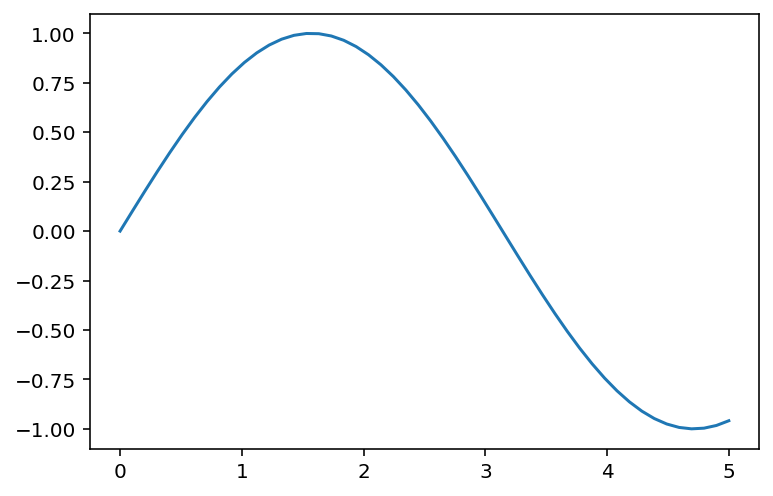

In [7]:
x = np.linspace(0, 5)
y = np.sin(x)

plt.plot(x, y)
#plt.show() # when running outside of the notebook we must call plt.show()

If we want to control properties of the figure, we can explicitly create it with `plt.figure`.
For example, we can control the size of the figure through the `figsize` argument, which expects a tuple of `(width, height)` in inches.

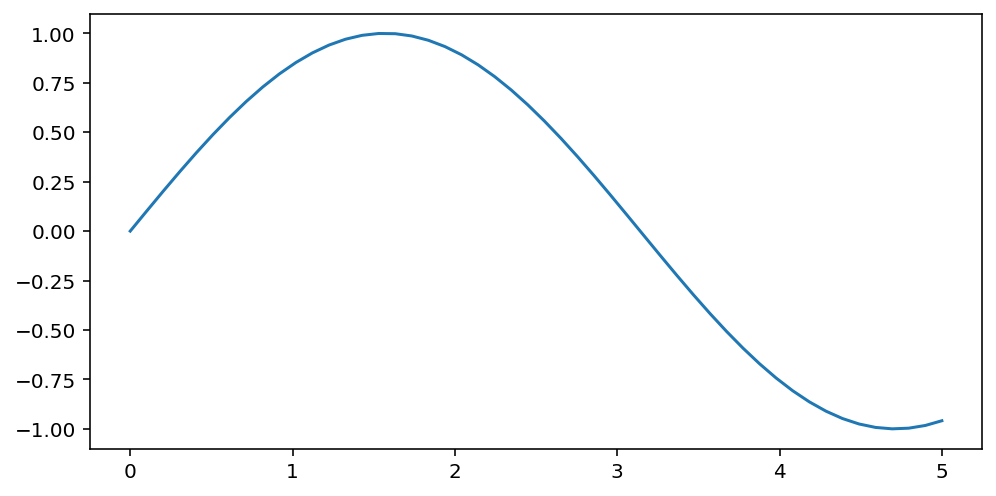

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(x, y)

To add axes labels, titles, and change ticks, we can call the relevant functions:

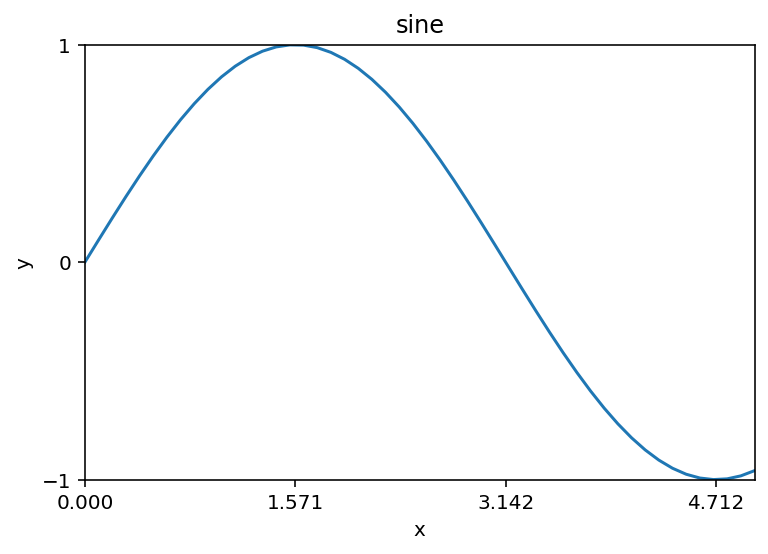

In [9]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('sine')
plt.xticks(np.arange(0, 2*np.pi, np.pi/2))
plt.yticks([-1, 0, 1])
plt.ylim(-1, 1)
plt.xlim(0, 5);

## Exercise 3

`plot` draws points with lines connecting them. 
But there are other plotting functions - a useful one is `bar`, which draws bars.

Plot the following bar plot; note the axes labels and title.

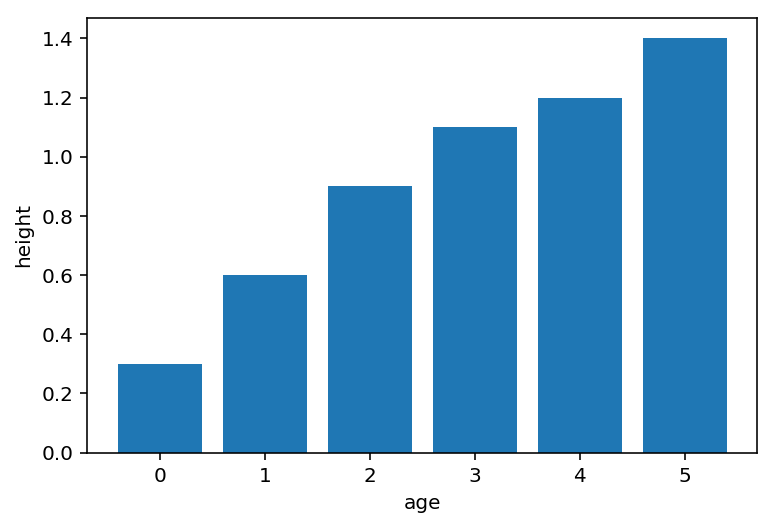

In [23]:
age = [0, 1, 2, 3, 4, 5]
height = [0.3, 0.6, 0.9, 1.1, 1.2, 1.4]

# your code here

## Axes methods vs. pyplot

Importantly, everything that can be done using `plt` can be done by creating explicit figures and axes and calling methods of an `Axes` object.
For example, when calling `plt.xlim(1, 10)`, `pyplot` calls `x.set_xlim(1, 10)` on whichever `Axes` is "current". Here is an equivalent version of the above example using the axes API.

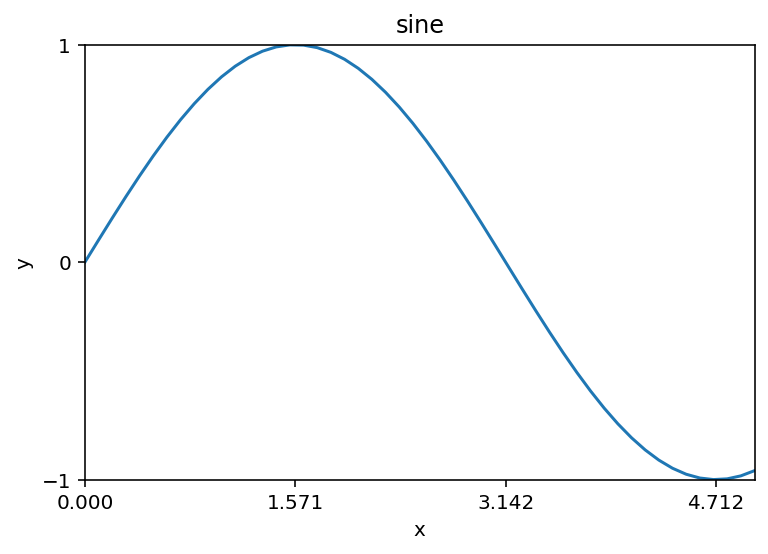

In [10]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('sine')
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/2))
ax.set_yticks([-1, 0, 1])
ax.set_ylim(-1, 1)
ax.set_xlim(0, 5);

### Multiple Axes

We've mentioned before that a figure can have more than one `Axes` on it. If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

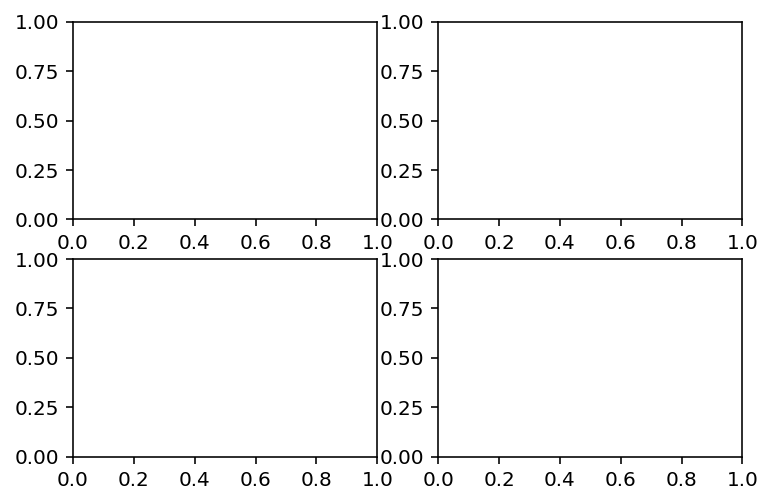

In [11]:
fig, axes = plt.subplots(2, 2) # nrows=2, ncols=2

`plt.subplots(...)` created a new figure and added 4 subplots to it. The axes object that was returned is a 2D numpy array. Each item in the array is one of the subplots. They're laid out as you see them on the figure.

Therefore, when we want to work with one of these axes, we can index the axes array and use that item's methods.

For example:

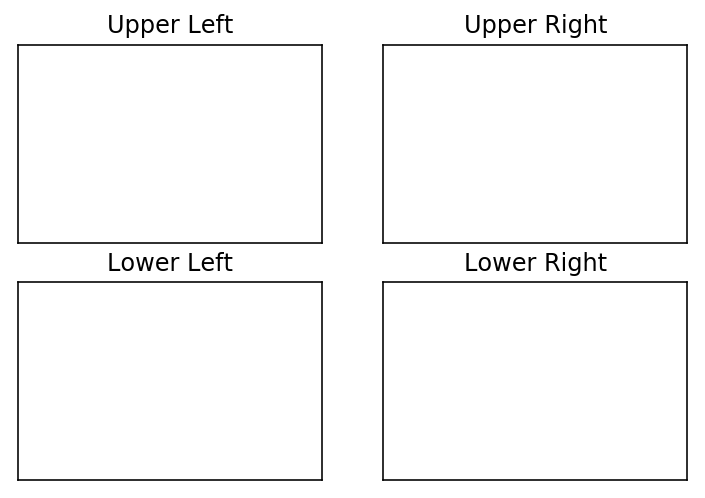

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, 
# use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])

When `plt.subplots` is called with no arguments, it creates a new figure with a single subplot. So this will be our default way of creating a figure and axes.

## Exercise 4

Try to reproduce the figure shown below. Can you figure out what to do next to plot `y1`, `y2`, and `y3` vs `x` on one figure?

*Tip* when you've finished plotting, call `fig.tight_layout()` to fix the layout.

In [28]:
x = np.linspace(0, 10, 100)
ys = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

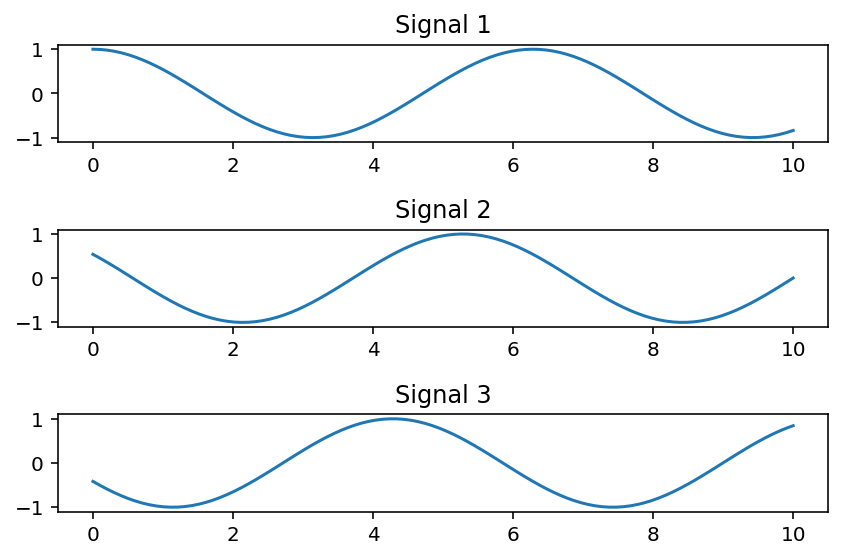

In [30]:
# your code here

## More

- [How to speak Matplotlib](http://nbviewer.jupyter.org/github/yoavram/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb) - control colors, markers, linestyles, plot attributes, colormaps, annotations, arrows, hatches, transforms, and rc configuration.
- [Limits, legends, & layouts](http://nbviewer.jupyter.org/github/yoavram/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part4-Limits_Legends_and_Layouts.ipynb)

# References

- [Anatomy of Matplotlib](https://github.com/WeatherGod/AnatomyOfMatplotlib) tutorial by [Benjamin Root](https://github.com/WeatherGod).
- Slides: [Introduction to NumPy, SciPy, and matplotlib](https://speakerdeck.com/cfinch/introduction-to-numpy-scipy-and-matplotlib) by Craig Finch.
- Notebooks: [Long Matplotlib tutorial](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb), [IPython-Matplotlib gallery](https://github.com/rasbt/matplotlib-gallery)
- [Why People Hate Jet – and You Should Too](https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/)
- Jake Vanderplas's [Minesweeper in Matplotlib](https://jakevdp.github.io/blog/2012/12/06/minesweeper-in-matplotlib/), [Quaternions and Key Bindings: Simple 3D Visualization in Matplotlib](http://jakevdp.github.io/blog/2012/11/24/simple-3d-visualization-in-matplotlib/) and [3D Interactive Rubik's Cube in Python](http://jakevdp.github.io/blog/2012/11/26/3d-interactive-rubiks-cube-in-python/) are amazing examples of what can be done with Matplotlib beyond simple plots and using a GUI.

# Colophon
This notebook was written by [Yoav Ram](http://python.yoavram.com) and is part of the [_Data Science with Python_](https://python.yoavram.com/Deep4Devs) workshops.

The notebook was written using [Python](http://python.org/) 3.6.5.
Dependencies listed in [environment.yml](../environment.yml).

This work is licensed under a CC BY-NC-SA 4.0 International License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)